# Movie Recommender Project

In [1]:
# Standard library
import math

# Data processing and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning: Preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Machine learning: Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Machine learning: Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
def convert_dat_to_csv(dat_file, csv_file, columns):
    df = pd.read_csv(dat_file, sep='::', header=None, names=columns, engine='python', encoding='latin-1')
    df.to_csv(csv_file, index=False)
    print(f"Converted {dat_file} to {csv_file}")

ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies_columns = ['MovieID', 'Title', 'Genres']

convert_dat_to_csv('ratings.dat', 'ratings.csv', ratings_columns)
convert_dat_to_csv('users.dat', 'users.csv', users_columns)
convert_dat_to_csv('movies.dat', 'movies.csv', movies_columns)

Converted ratings.dat to ratings.csv
Converted users.dat to users.csv
Converted movies.dat to movies.csv


In [3]:
ratings = pd.read_csv('ratings.csv')
users = pd.read_csv('users.csv')
movies = pd.read_csv('movies.csv')

##### Convert Timestamp to datetime and extract Year, Month, and Weekday

In [4]:
ratings['Datetime'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Year'] = ratings['Datetime'].dt.year
ratings['Month'] = ratings['Datetime'].dt.month
ratings['Weekday'] = ratings['Datetime'].dt.weekday

##### Check file formats and contents

In [5]:
print("Ratings DataFrame:")
print(ratings.head())
print("\nUsers DataFrame:")
print(users.head())
print("\nMovies DataFrame:")
print(movies.head())

Ratings DataFrame:
   UserID  MovieID  Rating  Timestamp            Datetime  Year  Month  \
0       1     1193       5  978300760 2000-12-31 22:12:40  2000     12   
1       1      661       3  978302109 2000-12-31 22:35:09  2000     12   
2       1      914       3  978301968 2000-12-31 22:32:48  2000     12   
3       1     3408       4  978300275 2000-12-31 22:04:35  2000     12   
4       1     2355       5  978824291 2001-01-06 23:38:11  2001      1   

   Weekday  
0        6  
1        6  
2        6  
3        6  
4        5  

Users DataFrame:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

Movies DataFrame:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        

##### Verify column names and data types

In [6]:
print("\nRatings Info:")
print(ratings.info())
print("\nUsers Info:")
print(users.info())
print("\nMovies Info:")
print(movies.info())


Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44715 entries, 0 to 44714
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserID     44715 non-null  int64         
 1   MovieID    44715 non-null  int64         
 2   Rating     44715 non-null  int64         
 3   Timestamp  44715 non-null  int64         
 4   Datetime   44715 non-null  datetime64[ns]
 5   Year       44715 non-null  int32         
 6   Month      44715 non-null  int32         
 7   Weekday    44715 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(4)
memory usage: 2.2 MB
None

Users Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation 

##### Identify potential missing values

In [7]:
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())
print("\nMissing Values in Users:")
print(users.isnull().sum())
print("\nMissing Values in Movies:")
print(movies.isnull().sum())


Missing Values in Ratings:
UserID       0
MovieID      0
Rating       0
Timestamp    0
Datetime     0
Year         0
Month        0
Weekday      0
dtype: int64

Missing Values in Users:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Missing Values in Movies:
MovieID    0
Title      0
Genres     0
dtype: int64


### Basic Statistics Computation

##### Convert Timestamp to datetime and extract Year, Month, and Weekday

In [8]:
ratings['Datetime'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Year'] = ratings['Datetime'].dt.year
ratings['Month'] = ratings['Datetime'].dt.month
ratings['Weekday'] = ratings['Datetime'].dt.weekday

In [9]:
num_users = users['UserID'].nunique()
num_movies = movies['MovieID'].nunique()
num_ratings = len(ratings)

print(f"Number of Users: {num_users}")
print(f"Number of Movies: {num_movies}")
print(f"Number of Ratings: {num_ratings}")

Number of Users: 6040
Number of Movies: 3883
Number of Ratings: 44715


##### Rating distribution (min, max, mean, median)

In [10]:
rating_stats = ratings['Rating'].describe()
print("\nRating Distribution:")
print(f"Min Rating: {rating_stats['min']}")
print(f"Max Rating: {rating_stats['max']}")
print(f"Mean Rating: {rating_stats['mean']:.2f}")
print(f"Median Rating: {rating_stats['50%']}")


Rating Distribution:
Min Rating: 1.0
Max Rating: 5.0
Mean Rating: 3.60
Median Rating: 4.0


##### Visualize rating distribution

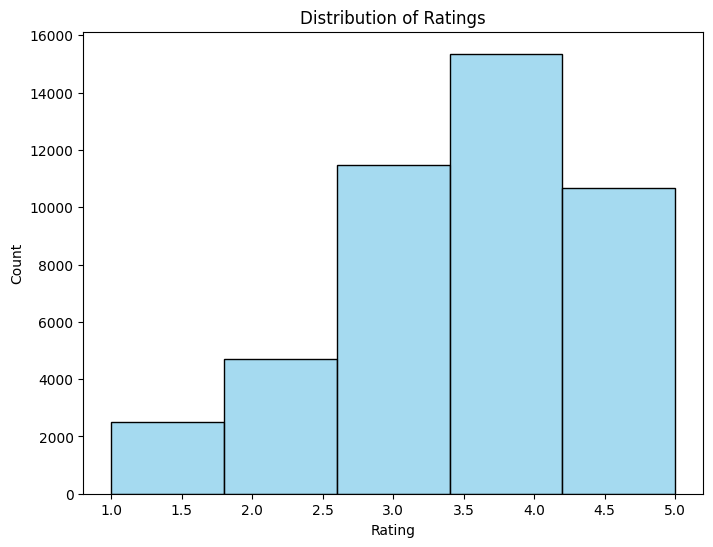

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(ratings['Rating'], bins=5, kde=False, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Temporal distribution of ratings

##### Temporal distribution by Year

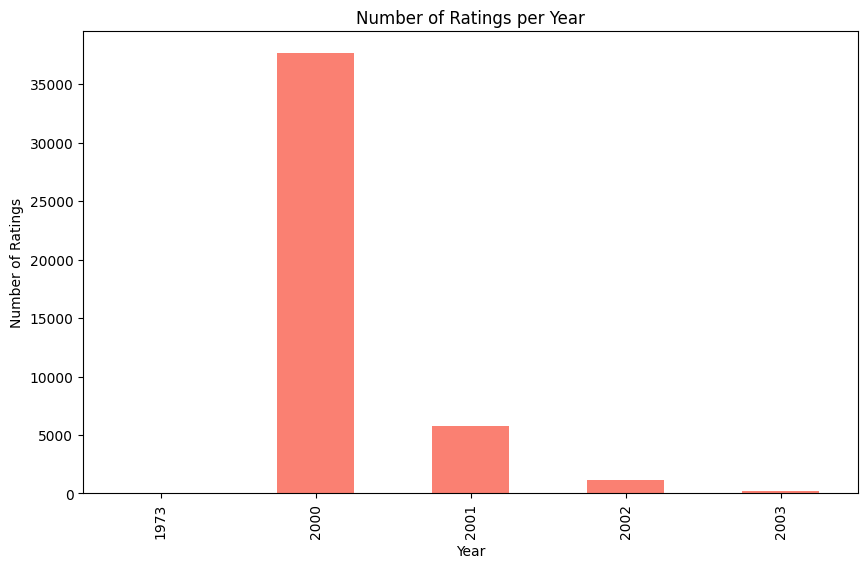

In [12]:
plt.figure(figsize=(10, 6))
ratings.groupby('Year')['Rating'].count().plot(kind='bar', color='salmon')
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

##### Temporal distribution by Month

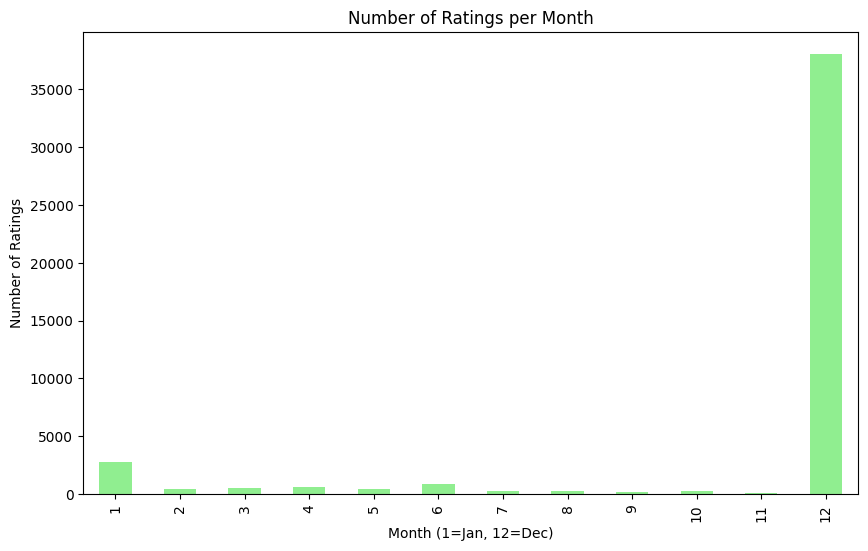

In [13]:
plt.figure(figsize=(10, 6))
ratings.groupby('Month')['Rating'].count().plot(kind='bar', color='lightgreen')
plt.title('Number of Ratings per Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Ratings')
plt.show()

##### Temporal distribution by Weekdaytings over time

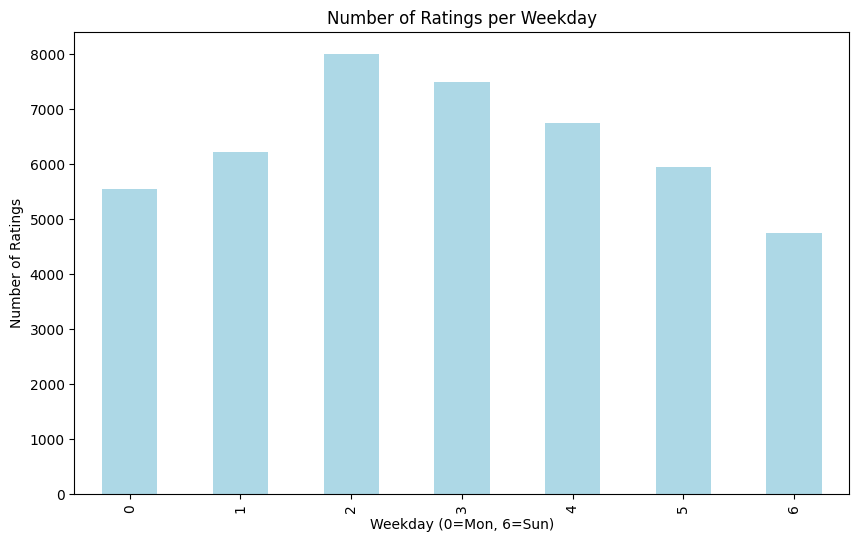

In [14]:
plt.figure(figsize=(10, 6))
ratings.groupby('Weekday')['Rating'].count().plot(kind='bar', color='lightblue')
plt.title('Number of Ratings per Weekday')
plt.xlabel('Weekday (0=Mon, 6=Sun)')
plt.ylabel('Number of Ratings')
plt.show()

##### Outliers in ratings

In [15]:
outliers_ratings = ratings[(ratings['Rating'] < 1) | (ratings['Rating'] > 5)]
print(f"\nNumber of Rating Outliers (outside 1-5): {len(outliers_ratings)}")


Number of Rating Outliers (outside 1-5): 0


##### Analyze rating patterns over time (Average Rating by Year, Month, Weekday)

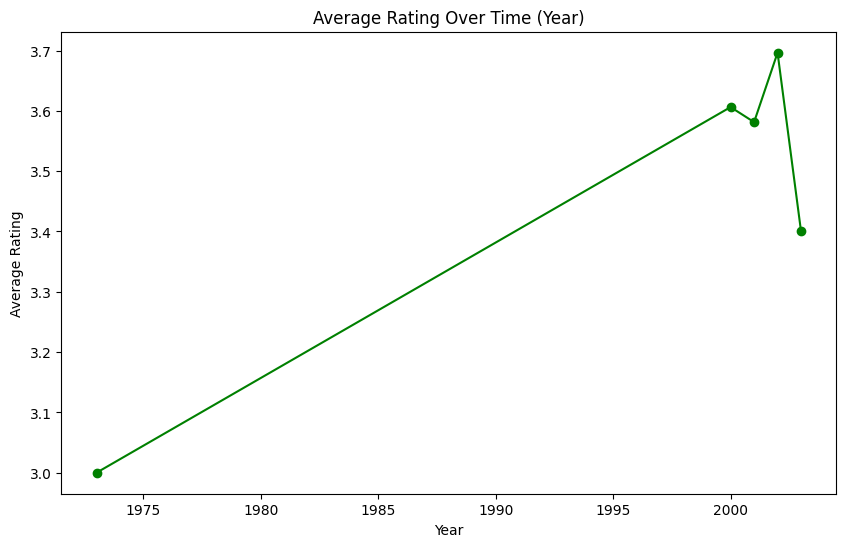

In [16]:
plt.figure(figsize=(10, 6))
ratings.groupby('Year')['Rating'].mean().plot(kind='line', marker='o', color='green')
plt.title('Average Rating Over Time (Year)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

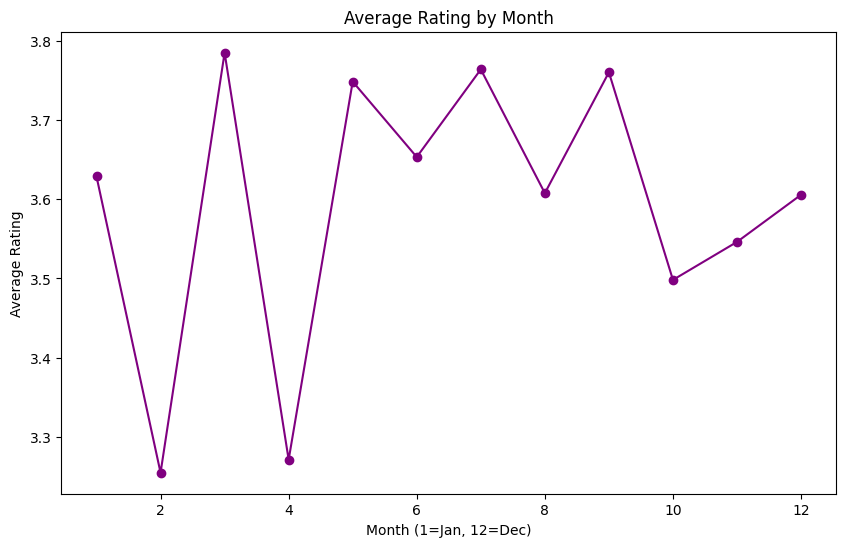

In [17]:
plt.figure(figsize=(10, 6))
ratings.groupby('Month')['Rating'].mean().plot(kind='line', marker='o', color='purple')
plt.title('Average Rating by Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Rating')
plt.show()

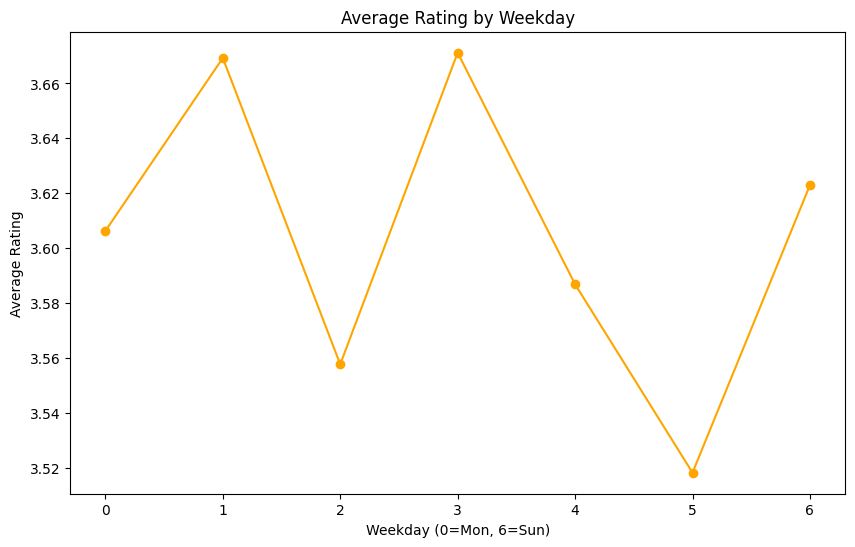

In [18]:
plt.figure(figsize=(10, 6))
ratings.groupby('Weekday')['Rating'].mean().plot(kind='line', marker='o', color='orange')
plt.title('Average Rating by Weekday')
plt.xlabel('Weekday (0=Mon, 6=Sun)')
plt.ylabel('Average Rating')
plt.show()

#### Movie Popularity Analysis

##### Merge ratings with movies to get movie titles

In [19]:
movie_ratings = pd.merge(ratings, movies, on='MovieID', how='left')

##### Count the number of ratings per movie

In [20]:
movie_rating_counts = movie_ratings.groupby(['MovieID', 'Title'])['Rating'].count().reset_index()
movie_rating_counts = movie_rating_counts.sort_values(by='Rating', ascending=False)

##### Select top 10 most-rated movies

<ipython-input-21-48fda68c40d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Title', data=top_movies, palette='viridis')


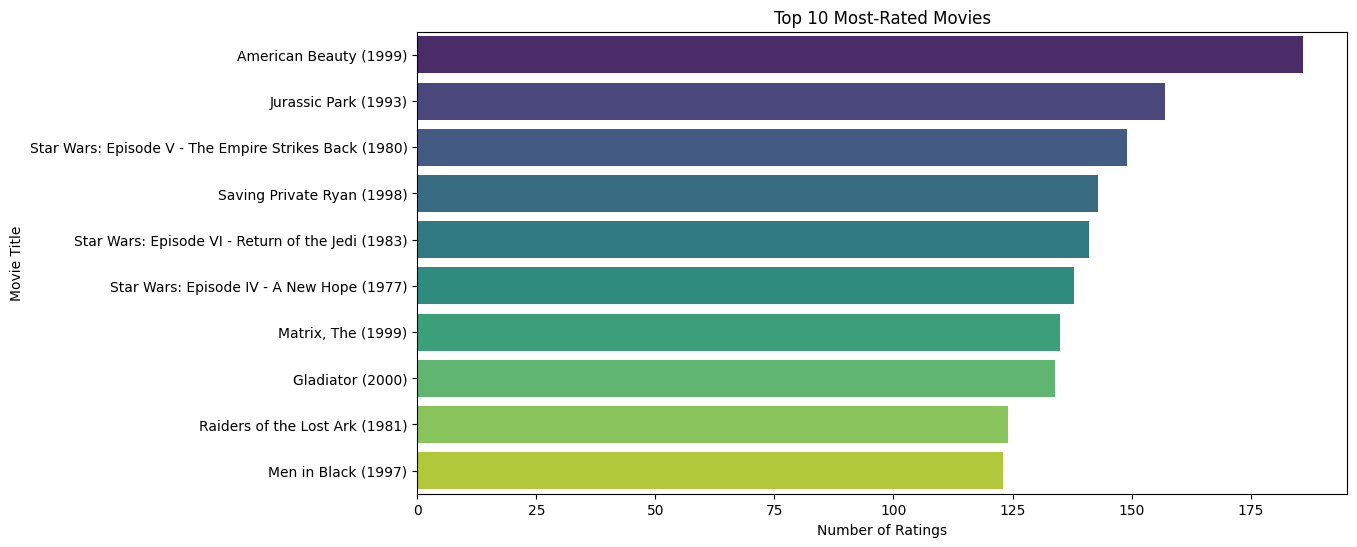

In [21]:
top_n = 10
top_movies = movie_rating_counts.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Title', data=top_movies, palette='viridis')
plt.title(f'Top {top_n} Most-Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

### Scatter Plot of Average Rating vs. Number of Ratings


In [22]:
movie_stats = movie_ratings.groupby('MovieID').agg(
    avg_rating=('Rating', 'mean'),
    num_ratings=('Rating', 'count')
).reset_index()

movie_stats = pd.merge(movie_stats, movies[['MovieID', 'Title']], on='MovieID', how='left')

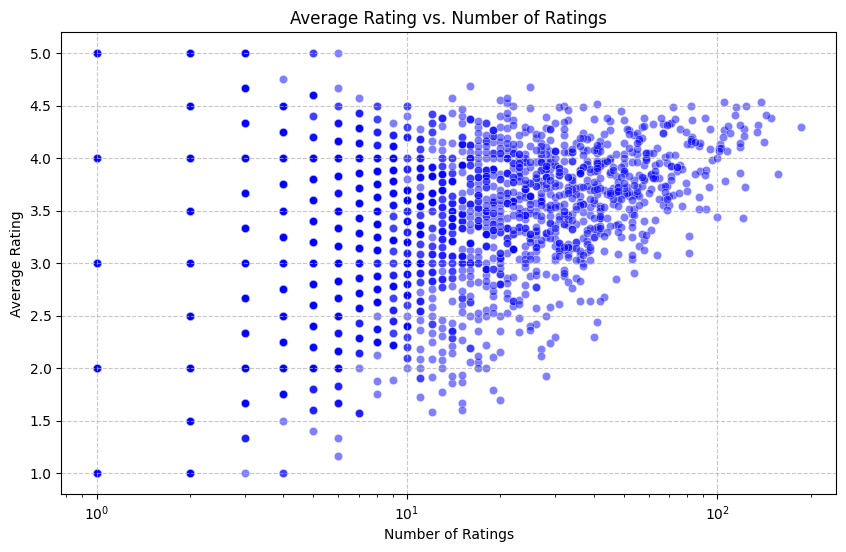

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ratings', y='avg_rating', data=movie_stats, alpha=0.5, color='blue')
plt.title('Average Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Identify "Blockbusters" vs. "Niche" Content

In [24]:
rating_threshold = 4.0
num_ratings_high = movie_stats['num_ratings'].quantile(0.75)
num_ratings_low = movie_stats['num_ratings'].quantile(0.25)

##### Blockbusters

In [25]:
blockbusters = movie_stats[
    (movie_stats['avg_rating'] >= rating_threshold) &
    (movie_stats['num_ratings'] >= num_ratings_high)
]
print(f"\nNumber of Blockbusters: {len(blockbusters)}")
print("Sample Blockbusters:")
print(blockbusters[['Title', 'avg_rating', 'num_ratings']].head())


Number of Blockbusters: 196
Sample Blockbusters:
                               Title  avg_rating  num_ratings
0                   Toy Story (1995)    4.137255          102
16      Sense and Sensibility (1995)    4.040000           50
46        Usual Suspects, The (1995)    4.500000           82
51  Postino, Il (The Postman) (1994)    4.047619           21
93                 Braveheart (1995)    4.278689          122


##### Niche content

In [26]:
niche = movie_stats[
    (movie_stats['avg_rating'] >= rating_threshold) &
    (movie_stats['num_ratings'] <= num_ratings_low)
]
print(f"\nNumber of Niche Movies: {len(niche)}")
print("Sample Niche Movies:")
print(niche[['Title', 'avg_rating', 'num_ratings']].head())


Number of Niche Movies: 318
Sample Niche Movies:
                                                Title  avg_rating  num_ratings
25                                     Othello (1995)    4.000000            3
26                                Now and Then (1995)    4.000000            3
37                    Cry, the Beloved Country (1995)    4.666667            3
50                       Home for the Holidays (1995)    5.000000            1
54  Don't Be a Menace to South Central While Drink...    4.000000            1


##### Split the pipe-separated genres into individual rows

In [27]:
movie_ratings['Genres'] = movie_ratings['Genres'].str.split('|')
movie_ratings_exploded = movie_ratings.explode('Genres')

### Bar Chart of Rating Distribution by Genre

In [28]:
genre_stats = movie_ratings_exploded.groupby('Genres').agg(
    avg_rating=('Rating', 'mean'),
    num_ratings=('Rating', 'count')
).reset_index()

##### Sort by number of ratings for better visualization

<ipython-input-29-9d8694e20e31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genres', y='num_ratings', data=genre_stats, palette='muted')


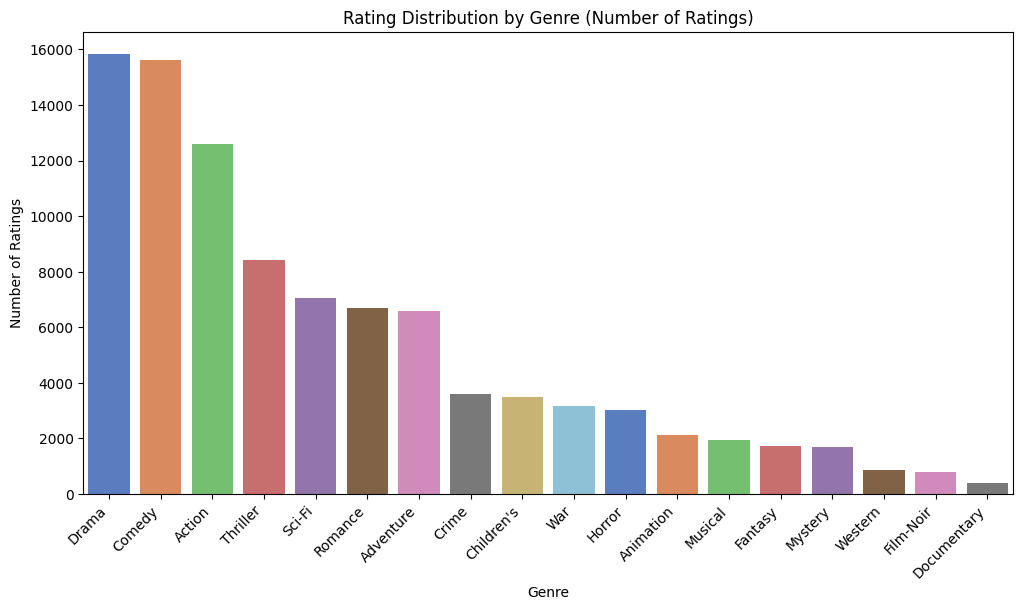

In [29]:
genre_stats = genre_stats.sort_values(by='num_ratings', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Genres', y='num_ratings', data=genre_stats, palette='muted')
plt.title('Rating Distribution by Genre (Number of Ratings)')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

### Heatmap of Genre Correlations

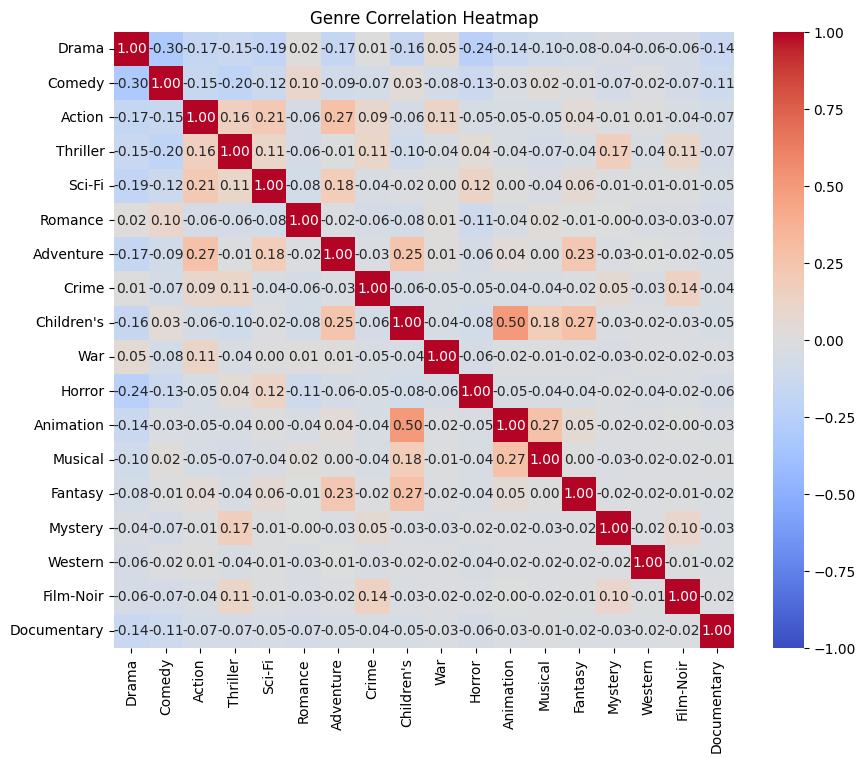

In [30]:
unique_genres = genre_stats['Genres'].tolist()
genre_matrix = pd.DataFrame(0, index=movies['MovieID'], columns=unique_genres)

for idx, row in movies.iterrows():
    movie_genres = row['Genres'].split('|')
    for genre in movie_genres:
        genre_matrix.loc[row['MovieID'], genre] = 1

genre_correlation = genre_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(genre_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Genre Correlation Heatmap')
plt.show()

### Identify Genre Preferences Across User Base

In [31]:
user_genre_prefs = movie_ratings_exploded.groupby(['UserID', 'Genres'])['Rating'].mean().reset_index()

user_genre_matrix = user_genre_prefs.pivot(index='UserID', columns='Genres', values='Rating').fillna(0)

genre_preferences = user_genre_matrix.mean().sort_values(ascending=False)

print("\nAverage Rating Preference by Genre Across Users:")
print(genre_preferences)


Average Rating Preference by Genre Across Users:
Genres
Drama          3.857461
War            3.788492
Thriller       3.669724
Romance        3.655126
Action         3.644993
Comedy         3.640425
Adventure      3.547008
Sci-Fi         3.484842
Crime          3.452496
Children's     3.110036
Mystery        3.080369
Animation      3.064817
Horror         2.804378
Fantasy        2.780954
Musical        2.761196
Film-Noir      2.572087
Western        2.370015
Documentary    1.177650
dtype: float64


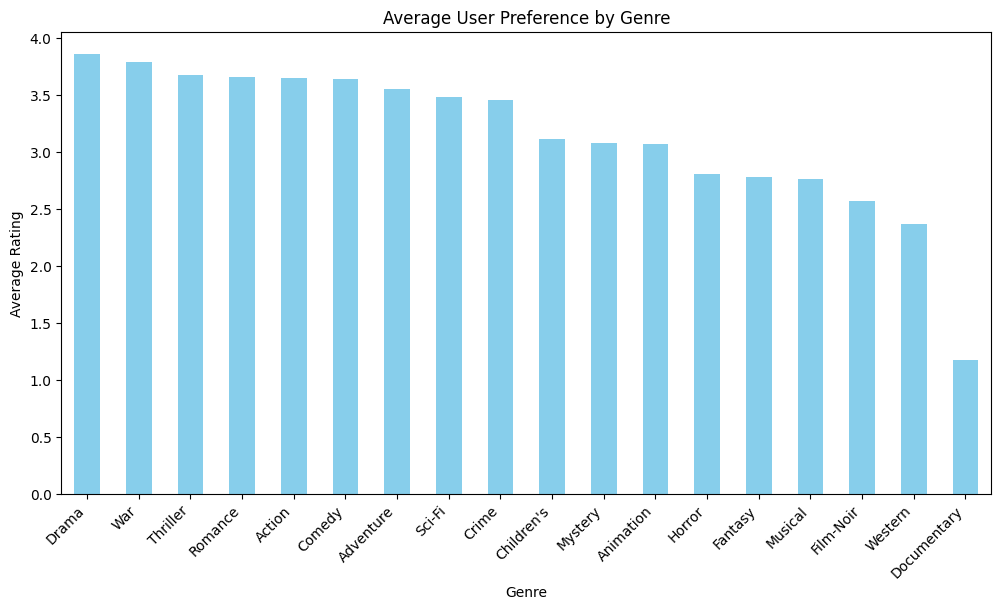

In [32]:
plt.figure(figsize=(12, 6))
genre_preferences.plot(kind='bar', color='skyblue')
plt.title('Average User Preference by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

### Data Preprocessing

#### Merging

In [33]:
ratings_users = pd.merge(ratings, users, on='UserID', how='left')

merged_data = pd.merge(ratings_users, movies, on='MovieID', how='left')

print("Merged Dataset Sample:")
print(merged_data.head())

Merged Dataset Sample:
   UserID  MovieID  Rating  Timestamp            Datetime  Year  Month  \
0       1     1193       5  978300760 2000-12-31 22:12:40  2000     12   
1       1      661       3  978302109 2000-12-31 22:35:09  2000     12   
2       1      914       3  978301968 2000-12-31 22:32:48  2000     12   
3       1     3408       4  978300275 2000-12-31 22:04:35  2000     12   
4       1     2355       5  978824291 2001-01-06 23:38:11  2001      1   

   Weekday Gender  Age  Occupation Zip-code  \
0        6      F    1          10    48067   
1        6      F    1          10    48067   
2        6      F    1          10    48067   
3        6      F    1          10    48067   
4        5      F    1          10    48067   

                                    Title                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fa

In [34]:
print(f"\nShape of Merged Dataset: {merged_data.shape}")
print("Columns:", merged_data.columns.tolist())


Shape of Merged Dataset: (44715, 14)
Columns: ['UserID', 'MovieID', 'Rating', 'Timestamp', 'Datetime', 'Year', 'Month', 'Weekday', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Title', 'Genres']


In [35]:
print("\nMissing Values in Merged Dataset:")
print(merged_data.isnull().sum())


Missing Values in Merged Dataset:
UserID        0
MovieID       0
Rating        0
Timestamp     0
Datetime      0
Year          0
Month         0
Weekday       0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64


In [36]:
df = merged_data.dropna(subset=['UserID', 'MovieID', 'Rating'])

In [37]:
df.isnull()

,UserID,MovieID,Rating,Timestamp,Datetime,Year,Month,Weekday,Gender,Age,Occupation,Zip-code,Title,Genres
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44710,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44711,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44712,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44713,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Categorical Encoding

In [38]:
occupation_encoded = pd.get_dummies(df['Occupation'], prefix='Occupation').astype('int8')

In [39]:
df['Genres'] = df['Genres'].str.split('|')
genres_exploded = df.explode('Genres')
genres_encoded = pd.get_dummies(genres_exploded['Genres'], prefix='Genre')
genres_encoded = genres_encoded.groupby(genres_exploded.index).sum().astype('int8')

age_mapping = {
    1: 'Under 18',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}
df['AgeGroup'] = df['Age'].map(age_mapping)
age_encoded = pd.get_dummies(df['AgeGroup'], prefix='Age').astype('int8')

In [40]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
numerical_columns = ['Rating', 'Datetime']

preprocessed_data = pd.concat([
    df[numerical_columns + ['Gender']],
    occupation_encoded,
    genres_encoded,
    age_encoded
], axis=1)

In [41]:
preprocessed_data['Datetime'] = pd.to_datetime(ratings['Timestamp'], unit='s').astype(int) / 10**9

In [42]:
df

,UserID,MovieID,Rating,Timestamp,Datetime,Year,Month,Weekday,Gender,Age,Occupation,Zip-code,Title,Genres,AgeGroup
0,1,1193,5,978300760,2000-12-31 22:12:40,2000,12,6,0,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],Under 18
1,1,661,3,978302109,2000-12-31 22:35:09,2000,12,6,0,1,10,48067,James and the Giant Peach (1996),"[Animation, Children's, Musical]",Under 18
2,1,914,3,978301968,2000-12-31 22:32:48,2000,12,6,0,1,10,48067,My Fair Lady (1964),"[Musical, Romance]",Under 18
3,1,3408,4,978300275,2000-12-31 22:04:35,2000,12,6,0,1,10,48067,Erin Brockovich (2000),[Drama],Under 18
4,1,2355,5,978824291,2001-01-06 23:38:11,2001,1,5,0,1,10,48067,"Bug's Life, A (1998)","[Animation, Children's, Comedy]",Under 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44710,302,292,4,976503808,2000-12-11 03:03:28,2000,12,0,1,18,4,04901,Outbreak (1995),"[Action, Drama, Thriller]",18-24
44711,302,293,5,976505335,2000-12-11 03:28:55,2000,12,0,1,18,4,04901,"Professional, The (a.k.a. Leon: The Profession...","[Crime, Drama, Romance, Thriller]",18-24
44712,302,44,1,976504049,2000-12-11 03:07:29,2000,12,0,1,18,4,04901,Mortal Kombat (1995),"[Action, Adventure]",18-24
44713,302,367,2,1014071774,2002-02-18 22:36:14,2002,2,0,1,18,4,04901,"Mask, The (1994)","[Comedy, Crime, Fantasy]",18-24


##### Preprocessed dataset

In [43]:
print("\nPreprocessed Dataset Sample:")
print(preprocessed_data.head())
print(f"\nShape of Preprocessed Dataset: {preprocessed_data.shape}")
print("Columns:", preprocessed_data.columns.tolist())


Preprocessed Dataset Sample:
   Rating     Datetime  Gender  Occupation_0  Occupation_1  Occupation_2  \
0       5  978300760.0       0             0             0             0   
1       3  978302109.0       0             0             0             0   
2       3  978301968.0       0             0             0             0   
3       4  978300275.0       0             0             0             0   
4       5  978824291.0       0             0             0             0   

   Occupation_3  Occupation_4  Occupation_5  Occupation_6  ...  \
0             0             0             0             0  ...   
1             0             0             0             0  ...   
2             0             0             0             0  ...   
3             0             0             0             0  ...   
4             0             0             0             0  ...   

   Genre_Thriller  Genre_War  Genre_Western  Age_18-24  Age_25-34  Age_35-44  \
0               0          0        

##### Train/Test Split (80%/20%)

In [44]:
train_data, test_data = train_test_split(preprocessed_data, test_size=0.2, random_state=42)

print(f"\nTraining Set Shape: {train_data.shape}")
print(f"Test Set Shape: {test_data.shape}")


Training Set Shape: (35772, 49)
Test Set Shape: (8943, 49)


##### Save the split datasets

In [45]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
print("\nTrain and test sets saved as 'train_data.csv' and 'test_data.csv'")


Train and test sets saved as 'train_data.csv' and 'test_data.csv'


### Supervised Learning

In [89]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

X_train = train_data.drop(columns=['Rating'])
y_train = train_data['Rating']
X_test = test_data.drop(columns=['Rating'])
y_test = test_data['Rating']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f" Root Mean Squared Error: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return y_pred

In [48]:
print("NaNs in X_train:")
print(X_train.isnull().sum())
print("\nNaNs in X_test:")
print(X_test.isnull().sum())

NaNs in X_train:
Datetime             0
Gender               0
Occupation_0         0
Occupation_1         0
Occupation_2         0
Occupation_3         0
Occupation_4         0
Occupation_5         0
Occupation_6         0
Occupation_7         0
Occupation_8         0
Occupation_9         0
Occupation_10        0
Occupation_11        0
Occupation_12        0
Occupation_13        0
Occupation_14        0
Occupation_15        0
Occupation_16        0
Occupation_17        0
Occupation_18        0
Occupation_19        0
Occupation_20        0
Genre_Action         0
Genre_Adventure      0
Genre_Animation      0
Genre_Children's     0
Genre_Comedy         0
Genre_Crime          0
Genre_Documentary    0
Genre_Drama          0
Genre_Fantasy        0
Genre_Film-Noir      0
Genre_Horror         0
Genre_Musical        0
Genre_Mystery        0
Genre_Romance        0
Genre_Sci-Fi         0
Genre_Thriller       0
Genre_War            0
Genre_Western        0
Age_18-24            0
Age_25-34        

In [49]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

##### K-Neighbors Regressor

In [91]:
knn_model = KNeighborsRegressor(n_neighbors=5)
y_pred_knn = evaluate_model(knn_model, X_train, X_test, y_train, y_test, "K-Neighbors Regressor")


K-Neighbors Regressor Results:
 Root Mean Squared Error: 1.0555
R² Score: 0.1364


##### Decision Tree Regressor

In [92]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
y_pred_dt = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree Regressor")


Decision Tree Regressor Results:
 Root Mean Squared Error: 1.0742
R² Score: 0.1056


##### Random Forest Regressor

In [52]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regressor")


Random Forest Regressor Results:
 Root Mean Squared Error: 1.0324
R² Score: 0.1738


##### XGBoost Regressor

In [53]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost Regressor")


XGBoost Regressor Results:
 Root Mean Squared Error: 1.0007
R² Score: 0.2238


##### XGBoost Regressor - Grid Search

In [54]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1]
}

xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

##### Fit Grid Search

In [55]:
def evaluate_model(model, X_test, y_test, model_name, test_data):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    if 'UserID' not in test_data.columns or 'MovieID' not in test_data.columns:
        print("UserID and/or MovieID missing in test_data. Attempting to reconstruct...")

        ratings = pd.read_csv('ratings.csv')
        if len(test_data) <= len(ratings):
            test_data['UserID'] = ratings['UserID'].iloc[test_data.index].values
            test_data['MovieID'] = ratings['MovieID'].iloc[test_data.index].values
        else:
            raise ValueError("test_data size exceeds ratings.csv; cannot align UserID and MovieID.")
    test_data['Predicted'] = y_pred

    return rmse, mae, test_data

In [56]:
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [6, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
best_xgb_model = xgb_grid_search.best_estimator_
print("\nBest XGBoost Parameters:", xgb_grid_search.best_params_)
xgb_rmse, xgb_mae, output_df = evaluate_model(best_xgb_model, X_test_scaled, y_test, "Tuned XGBoost Regressor", test_data)


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Tuned XGBoost Regressor Results:
RMSE: 1.2224
MAE: 0.9929
UserID and/or MovieID missing in test_data. Attempting to reconstruct...


In [58]:
print("\nSample Output with Predictions:")
print(test_data.head())


Sample Output with Predictions:
   Rating      Datetime  Gender  Occupation_0  Occupation_1  Occupation_2  \
0       1  9.781043e+08       0             1             0             0   
1       4  9.779691e+08       0             0             0             0   
2       5  9.774169e+08       1             0             0             0   
3       5  9.781028e+08       0             1             0             0   
4       1  1.041968e+09       0             0             1             0   

   Occupation_3  Occupation_4  Occupation_5  Occupation_6  ...  Age_18-24  \
0             0             0             0             0  ...          1   
1             1             0             0             0  ...          0   
2             0             1             0             0  ...          1   
3             0             0             0             0  ...          1   
4             0             0             0             0  ...          0   

   Age_25-34  Age_35-44  Age_45-49  Age_5

In [59]:
test_data['UserID'].value_counts()

,count
UserID,
53,684
48,598
58,437
10,401
26,400
33,391
36,351
18,305
23,304


### Recommendations

##### Select a random user

In [60]:
random_user = np.random.choice(test_data['UserID'].unique())
print(f"Selected User: {random_user}")

Selected User: 2


##### Filter test_data for the selected user and get top 5 recommendations based on Predicted ratings

In [61]:
user_predictions = test_data[test_data['UserID'] == random_user][['MovieID', 'Predicted']]
top_5_recommendations = user_predictions.sort_values(by='Predicted', ascending=False).head(5)

In [62]:
top_5_recommendations = pd.merge(top_5_recommendations, movies[['MovieID', 'Title', 'Genres']], on='MovieID', how='left')

In [63]:
print(f"\nTop 5 Recommendations for User {random_user}:")
print(top_5_recommendations[['MovieID', 'Title', 'Genres', 'Predicted']])


Top 5 Recommendations for User 2:
   MovieID                                Title                  Genres  \
0     1213                    GoodFellas (1990)             Crime|Drama   
1     2943                     Indochine (1992)           Drama|Romance   
2     3678  Man with the Golden Arm, The (1955)                   Drama   
3      434                   Cliffhanger (1993)  Action|Adventure|Crime   
4     2396           Shakespeare in Love (1998)          Comedy|Romance   

   Predicted  
0   5.268605  
1   5.246701  
2   5.181736  
3   4.600531  
4   4.556426  


In [64]:
user_ratings = test_data[test_data['UserID'] == random_user][['MovieID', 'Rating']]
print(f"\nUser {random_user}'s Rating History (Sample):")
print(user_ratings.head())


User 2's Rating History (Sample):
    MovieID  Rating
53     1357       3
54     3068       3
55     1537       4
56      647       4
57     2194       2


In [65]:
movie_ids = top_5_recommendations['MovieID'].values
predicted_ratings = top_5_recommendations['Predicted'].values

### Reinforcement Learning

#### RL Environment Setup

In [66]:
users = test_data['UserID'].unique()
movies = test_data['MovieID'].unique()

reward_df = pd.DataFrame(0, index=users, columns=movies, dtype=np.int8)

In [67]:
for user_id in users:
    for movie_id in movies:
        user_rating = ratings[(ratings['UserID'] == user_id) & (ratings['MovieID'] == movie_id)]['Rating']
        if not user_rating.empty:
            actual_rating = user_rating.iloc[0]
            if actual_rating <= 3.0:
                reward = -1
            elif 3.0 < actual_rating < 4.0:
                reward = 0
            else:
                reward = 1
        else:
            reward = 0
        reward_df.at[user_id, movie_id] = reward

reward_df.to_csv('user_movie_rewards.csv')

In [68]:
print("Sample of User-Movie Reward DataFrame (first 10 users, first 10 movies):")
print(reward_df.iloc[:10, :10])
print(f"Shape of reward_df: {reward_df.shape}")

Sample of User-Movie Reward DataFrame (first 10 users, first 10 movies):
    1193  661   914   3408  2355  1197  1287  2804  594   919 
1      1    -1    -1     1     1    -1     1     1     1     1
2      1     0     0     0     0     0     0     0     0     0
3      0     0     0     0     1     1     0     0     0     0
4      0     0     0     0     0     0     0     0     0     0
5      0     0     0    -1     1     0     0     0     0     1
6      0     0     1     1     0     0     0     0     0     0
7      0     0     0     0     0     0     0     0     0     0
8      0     0     0     0     0     0     0     0     0     0
9      0     0     0     1     1     0     0     0     0     0
10     0     0     1     1     1     1    -1     1     1     1
Shape of reward_df: (60, 2055)


In [69]:
num_users = len(users)
current_user = None
action_movie_ids = None
state = np.array([0, 0, 0], dtype=np.float32)
max_interactions = 20
num_actions = 5
all_movie_ids = reward_df.columns.values
user_index = 0

In [70]:
recommendations_dict = {}
for user_id in users:
    user_predictions = test_data[test_data['UserID'] == user_id][['MovieID', 'Predicted']]
    if user_predictions.empty:
        continue
    top_5 = user_predictions.sort_values(by='Predicted', ascending=False).head(5)
    if len(top_5) == 0:
        continue
    recommendations_dict[user_id] = {
        'movie_ids': top_5['MovieID'].values,
        'predicted_ratings': top_5['Predicted'].values
    }

In [71]:
def reset_environment():
    global state, current_user, movie_ids
    global user_index
    current_user = users[user_index % num_users]
    user_index = (user_index + 1) % num_users

    if current_user not in recommendations_dict:
        state = np.array([0, 0, 0], dtype=np.float32)
        return state

    user_recs = recommendations_dict[current_user]
    movie_ids = user_recs['movie_ids']

    state = np.array([0, 0, 0], dtype=np.float32)
    return state

In [72]:
def step_environment(action):
    global state

    if len(movie_ids) == 0:
        reward = 0
        state = np.array([0, reward, state[2] + 1], dtype=np.float32)
        done = state[2] >= max_interactions
        return state, reward, done, {'movie_id': 0, 'reward': reward}

    selected_movie = movie_ids[action]

    reward = reward_df.at[current_user, selected_movie]

    num_interactions = state[2] + 1
    state = np.array([selected_movie, reward, num_interactions], dtype=np.float32)

    done = num_interactions >= max_interactions
    info = {'movie_id': selected_movie, 'reward': reward}
    return state, reward, done, info

def render_environment():
    print(f"User {current_user} | State: {state} | Last Reward: {state[1]}")

In [73]:
print("Testing RL Environment Setup:")
user_index = 0
for _ in range(3):
    state = reset_environment()
    print(f"\nUser {current_user} (Action MovieIDs: {action_movie_ids}):")
    for _ in range(3):
        action = np.random.randint(0, num_actions)
        state, reward, done, info = step_environment(action)
        print(f"Action: {action}, Movie: {info['movie_id']}, Reward: {reward}")
        render_environment()
        if done:
            print("Episode ended due to max interactions reached.")
            break

print("RL Environment Testing Complete!")

Testing RL Environment Setup:

User 1 (Action MovieIDs: None):
Action: 3, Movie: 1566, Reward: 1
User 1 | State: [1.566e+03 1.000e+00 1.000e+00] | Last Reward: 1.0
Action: 0, Movie: 1022, Reward: 1
User 1 | State: [1.022e+03 1.000e+00 2.000e+00] | Last Reward: 1.0
Action: 3, Movie: 1566, Reward: 1
User 1 | State: [1.566e+03 1.000e+00 3.000e+00] | Last Reward: 1.0

User 2 (Action MovieIDs: None):
Action: 1, Movie: 2943, Reward: 1
User 2 | State: [2.943e+03 1.000e+00 1.000e+00] | Last Reward: 1.0
Action: 2, Movie: 3678, Reward: -1
User 2 | State: [ 3.678e+03 -1.000e+00  2.000e+00] | Last Reward: -1.0
Action: 3, Movie: 434, Reward: -1
User 2 | State: [434.  -1.   3.] | Last Reward: -1.0

User 3 (Action MovieIDs: None):
Action: 2, Movie: 1615, Reward: 1
User 3 | State: [1.615e+03 1.000e+00 1.000e+00] | Last Reward: 1.0
Action: 3, Movie: 2997, Reward: -1
User 3 | State: [ 2.997e+03 -1.000e+00  2.000e+00] | Last Reward: -1.0
Action: 1, Movie: 3868, Reward: -1
User 3 | State: [ 3.868e+03 -1.0

#### Initializing with Supervised Model

In [74]:
pretrained_ratings = predicted_ratings
print("\nPretrained Predicted Ratings for Top 5 Movies:")
for movie_id, rating in zip(movie_ids, pretrained_ratings):
    print(f"Movie {movie_id}: {rating:.4f}")


Pretrained Predicted Ratings for Top 5 Movies:
Movie 593: 5.2686
Movie 3868: 5.2467
Movie 1615: 5.1817
Movie 2997: 4.6005
Movie 2858: 4.5564


##### Normalize pretrained ratings to probabilities

In [75]:
from sklearn.preprocessing import normalize

initial_policy = normalize(pretrained_ratings.reshape(1, -1), norm='l1')[0]
print(f"\nInitial Policy Probabilities for User {random_user}:")
for movie_id, prob in zip(movie_ids, initial_policy):
    print(f"Movie {movie_id}: {prob:.4f}")

def select_action_initial_policy():
    return np.random.choice(range(num_actions), p=initial_policy)


Initial Policy Probabilities for User 2:
Movie 593: 0.2120
Movie 3868: 0.2111
Movie 1615: 0.2085
Movie 2997: 0.1851
Movie 2858: 0.1833


##### Test the environment with initial policy

In [76]:
print(f"\nTesting Initial Policy for User {random_user}:")
state = reset_environment()
for _ in range(3):
    action = select_action_initial_policy()
    new_state, reward, done, info = step_environment(action)
    print(f"Action: {action}, Movie: {info['movie_id']} Reward: {reward}")
    render_environment()
    if done:
        break

print("RL Environment Setup and Initialization Complete!")


Testing Initial Policy for User 2:
Action: 1, Movie: 260 Reward: 1
User 4 | State: [260.   1.   1.] | Last Reward: 1.0
Action: 3, Movie: 1240 Reward: 1
User 4 | State: [1.24e+03 1.00e+00 2.00e+00] | Last Reward: 1.0
Action: 0, Movie: 2951 Reward: 1
User 4 | State: [2.951e+03 1.000e+00 3.000e+00] | Last Reward: 1.0
RL Environment Setup and Initialization Complete!


### Q-Learning

In [77]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
num_episodes = 500
epsilon_decay = 0.995

##### Initialize Q-table: [num_interactions, last_rating, actions]

In [78]:
state_space_size = (max_interactions + 1, 2)
q_table = np.zeros((state_space_size[0], state_space_size[1], num_actions))

In [80]:
def get_state_index(state):
    num_interactions = int(state[2])
    last_reward = int(state[1])
    return num_interactions, last_reward

##### Q-Learning algorithm

In [81]:
print("Starting Q-Learning Across All Users...")
for episode in range(num_episodes):
    state = reset_environment()
    done = False

    while not done:
        state_idx = get_state_index(state)
        if np.random.random() < epsilon:
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(q_table[state_idx])
        next_state, reward, done, info = step_environment(action)
        next_state_idx = get_state_index(next_state)
        old_q = q_table[state_idx][action]
        next_max_q = np.max(q_table[next_state_idx])
        q_table[state_idx][action] = old_q + alpha * (reward + gamma * next_max_q - old_q)
        state = next_state

    epsilon = max(0.01, epsilon * epsilon_decay)

    if episode % 10 == 0:
        print(f"Episode {episode} completed | Current User: {current_user} | Epsilon: {epsilon:.6f}")

Starting Q-Learning Across All Users...
Episode 0 completed | Current User: 6 | Epsilon: 0.099500
Episode 10 completed | Current User: 16 | Epsilon: 0.094635
Episode 20 completed | Current User: 26 | Epsilon: 0.090009
Episode 30 completed | Current User: 36 | Epsilon: 0.085608
Episode 40 completed | Current User: 46 | Epsilon: 0.081423
Episode 50 completed | Current User: 56 | Epsilon: 0.077442
Episode 60 completed | Current User: 6 | Epsilon: 0.073656
Episode 70 completed | Current User: 16 | Epsilon: 0.070055
Episode 80 completed | Current User: 26 | Epsilon: 0.066630
Episode 90 completed | Current User: 36 | Epsilon: 0.063372
Episode 100 completed | Current User: 46 | Epsilon: 0.060274
Episode 110 completed | Current User: 56 | Epsilon: 0.057327
Episode 120 completed | Current User: 6 | Epsilon: 0.054525
Episode 130 completed | Current User: 16 | Epsilon: 0.051859
Episode 140 completed | Current User: 26 | Epsilon: 0.049324
Episode 150 completed | Current User: 36 | Epsilon: 0.04691

##### Test the learned policy

### UCB Implementation

In [82]:
number_of_users = len(reward_df)
d_movies = len(reward_df.columns)
movies_chosen = []
total_reward = 0

In [83]:
number_selections = [0] * d_movies
sums_of_rewards = [0] * d_movies

In [84]:
for n in range(0, number_of_users):
    ub_for_each_movie = {}

    for i in range(0, d_movies):
        if number_selections[i] > 0:
            avg_r = sums_of_rewards[i] / number_selections[i]
            delta_i = math.sqrt(1.5 * math.log(n + 1) / number_selections[i])
            upper_bound = avg_r + delta_i
        else:
            upper_bound = 1e400
        ub_for_each_movie[i] = upper_bound

    sorted_movies = sorted(ub_for_each_movie.items(), key=lambda x: x[1], reverse=True)
    top_3_movies = [movie_idx for movie_idx, _ in sorted_movies[:3]]

    movies_chosen.append(top_3_movies)

    user_reward = 0
    for movie in top_3_movies:
        number_selections[movie] += 1
        reward = reward_df.values[n, movie]
        sums_of_rewards[movie] += reward
        user_reward += reward

    total_reward += user_reward

In [85]:
print("UCB Movie Recommendation Results (3 Movies per User):")
print(f"Total Reward: {total_reward}")
print("\nMovies Chosen for Each User (First 10 Users):")
for user_idx, movies in enumerate(movies_chosen[:10]):
    movie_ids = [int(reward_df.columns[movie]) for movie in movies]
    print(f"User {reward_df.index[user_idx]}: Movies {movie_ids}")

UCB Movie Recommendation Results (3 Movies per User):
Total Reward: 12

Movies Chosen for Each User (First 10 Users):
User 1: Movies [1193, 661, 914]
User 2: Movies [3408, 2355, 1197]
User 3: Movies [1287, 2804, 594]
User 4: Movies [919, 595, 938]
User 5: Movies [2398, 2918, 1035]
User 6: Movies [2791, 2687, 2018]
User 7: Movies [3105, 2797, 2321]
User 8: Movies [720, 1270, 527]
User 9: Movies [2340, 48, 1097]
User 10: Movies [1721, 1545, 745]


In [86]:
print("\nSelection Count for Each Movie (First 10 Movies):")
for movie_idx in range(min(10, d_movies)):
    print(f"Movie {int(reward_df.columns[movie_idx])}: Selected {number_selections[movie_idx]} times")


Selection Count for Each Movie (First 10 Movies):
Movie 1193: Selected 1 times
Movie 661: Selected 1 times
Movie 914: Selected 1 times
Movie 3408: Selected 1 times
Movie 2355: Selected 1 times
Movie 1197: Selected 1 times
Movie 1287: Selected 1 times
Movie 2804: Selected 1 times
Movie 594: Selected 1 times
Movie 919: Selected 1 times
